# Multinomial Classification

![](banner_multi-class.jpg)


_<p style="text-align: center;"> Fencers compete in a round-robin tournament ... </p>_

In [23]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)
update_geom_defaults("point", list(size=3, colour="grey50"))

.................................................... start of document ....................................................

## Introduction

Motivation, context, history, related topics ...

Some classifier construction methods come in versions for multinomial prediction: naive Bayes, neural network, decision tree, nearest neighbors.

Any classifier construction method for binary prediction can be enhanced for multinomial prediction by either of two approaches: one vs. many, one vs. one.

## Terms



## Data

Consider this pedgogical dataset and new unclassified observation.  Note that the dataset comprises observations of more than 2 classes.

In [24]:
data = data.frame(x1   =c( 1,  1,  4,  2,  2,  6,  7,  7,  7,  7,  8,  8,  9,  9,  9),
                  x2   =c( 5,  6,  3,  4,  7,  8,  2,  3,  5,  5,  6,  9,  1,  2,  3),
                  class=c("B","C","B","A","A","A","A","A","B","C","A","B","C","B","C"))
new = data.frame(x1=5.2, x2=4)

layout(fmt(size(data)), fmt(data), fmt(new))

size(data) 
 
 
 observations 
 variables 
 
 
 
 
 15 
 3 
 
 
 
 data 
 
 
 x1 
 x2 
 class 
 
 
 
 
 1 
 5 
 B 
 
 
 1 
 6 
 C 
 
 
 4 
 3 
 B 
 
 
 2 
 4 
 A 
 
 
 2 
 7 
 A 
 
 
 6 
 8 
 A 
 
 
 7 
 2 
 A 
 
 
 7 
 3 
 A 
 
 
 7 
 5 
 B 
 
 
 7 
 5 
 C 
 
 
 8 
 6 
 A 
 
 
 8 
 9 
 B 
 
 
 9 
 1 
 C 
 
 
 9 
 2 
 B 
 
 
 9 
 3 
 C 
 
 
 
 new 
 
 
 x1 
 x2 
 
 
 
 
 5.2 
 4

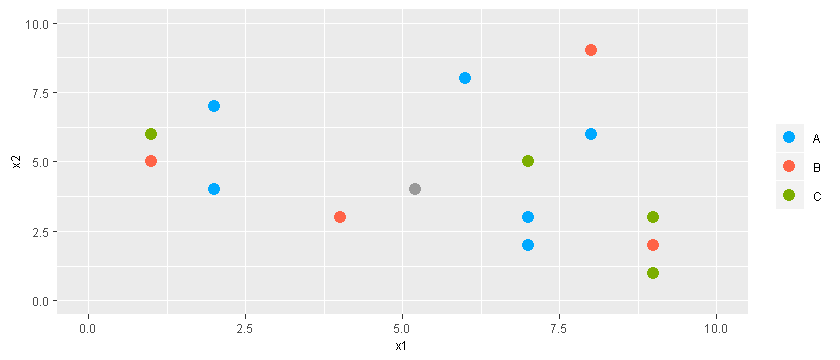

In [25]:
ggplot(data) + xlim(0,10) + ylim(0,10) + 
geom_point(aes(x=x1, y=x2, color=class)) +
geom_point(aes(x=x1, y=x2), data=new, color=NEW_COLOR)

## Multinomial Naive Bayes

Naive bayes handles multiple class values.  It computes prior and conditional probabilities associated with each class value.

Prior probabilities of all class values:

A,B,C
0.4,0.3333333,0.2666667


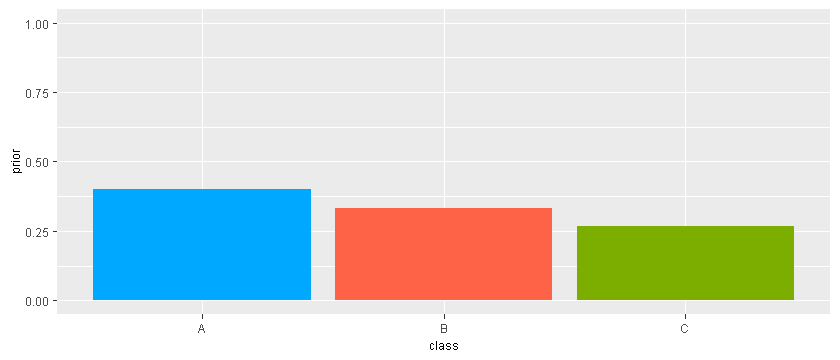

In [26]:
freq = table(data$class)
prior = as.data.frame(t(as.matrix(freq / sum(freq))))

fmt(prior)

prob = data.frame(class=names(freq), prior=as.numeric(prior))
ggplot(prob) + ylim(0,1) + geom_col(aes(x=class, y=prior), fill=PALETTE[1:3])

Likelihoods of all potential x1 values given class values:

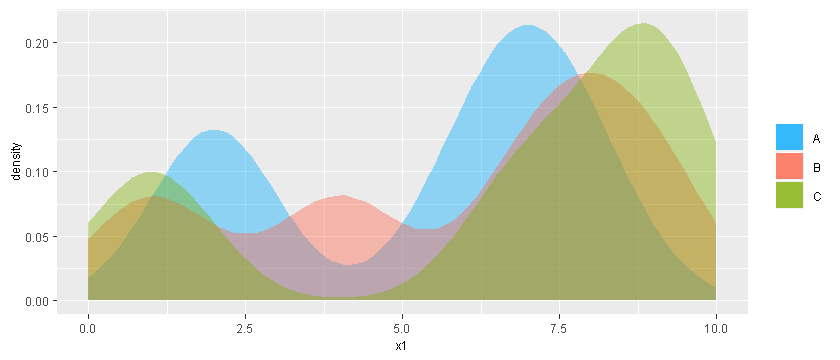

In [27]:
d.A = density(data$x1[data$class=="A"], bw=1, from=0, to=10); pdf.A.x1 = approxfun(d.A)
d.B = density(data$x1[data$class=="B"], bw=1, from=0, to=10); pdf.B.x1 = approxfun(d.B)
d.C = density(data$x1[data$class=="C"], bw=1, from=0, to=10); pdf.C.x1 = approxfun(d.C)

ggplot(data) + xlim(0,10) + xlab("x1") + ylab("density") +
stat_function(aes(fill="A"), fun=pdf.A.x1, geom="area", alpha=0.4) +
stat_function(aes(fill="B"), fun=pdf.B.x1, geom="area", alpha=0.4) +
stat_function(aes(fill="C"), fun=pdf.C.x1, geom="area", alpha=0.4)

Likelihoods of all potential x2 values given class values:

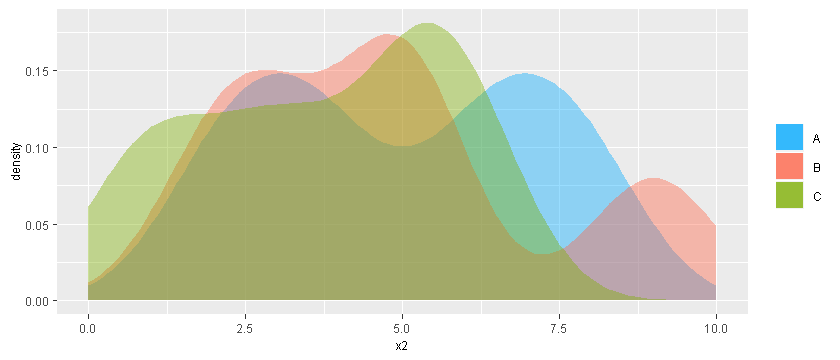

In [28]:
d.A = density(data$x2[data$class=="A"], bw=1, from=0, to=10); pdf.A.x2 = approxfun(d.A)
d.B = density(data$x2[data$class=="B"], bw=1, from=0, to=10); pdf.B.x2 = approxfun(d.B)
d.C = density(data$x2[data$class=="C"], bw=1, from=0, to=10); pdf.C.x2 = approxfun(d.C)

ggplot(data) + xlim(0,10) + xlab("x2") + ylab("density") +
stat_function(aes(fill="A"), fun=pdf.A.x2, geom="area", alpha=0.4) +
stat_function(aes(fill="B"), fun=pdf.B.x2, geom="area", alpha=0.4) +
stat_function(aes(fill="C"), fun=pdf.C.x2, geom="area", alpha=0.4)

Predict probability of class of new observation.  Select best choice based on relative magnitude, rather than based on a cutoff.

In [29]:
product.A = prior$A * pdf.A.x1(new$x1) * pdf.A.x2(new$x2)
product.B = prior$B * pdf.B.x1(new$x1) * pdf.B.x2(new$x2)
product.C = prior$C * pdf.C.x1(new$x1) * pdf.C.x2(new$x2)

data.frame(new,
           class=c("A","B","C"),
           prior=c(prior$A, prior$B, prior$C),
           likelihood.x1=c(pdf.A.x1(new$x1), pdf.B.x1(new$x1), pdf.C.x1(new$x1)),
           likelihood.x2=c(pdf.A.x2(new$x2), pdf.B.x2(new$x2), pdf.C.x2(new$x2)),
           posterior=c(product.A, product.B, product.C))

x1,x2,class,prior,likelihood.x1,likelihood.x2,posterior
5.2,4,A,0.4000000,0.07686254,0.1256948,0.0038644891
5.2,4,B,0.3333333,0.05641618,0.1561742,0.0029369173
5.2,4,C,0.2666667,0.01997650,0.1357819,0.0007233191


In [30]:
prob.A = product.A / sum(product.A, product.B, product.C)
prob.B = product.B / sum(product.A, product.B, product.C)
prob.C = product.C / sum(product.A, product.B, product.C)

prob = data.frame(A=prob.A, B=prob.B, C=prob.C)

layout(fmt(new), fmt(prob), fmt(pick(prob, max), "pick", force=TRUE))

new 
 
 
 x1 
 x2 
 
 
 
 
 5.2 
 4 
 
 
 
 prob 
 
 
 A 
 B 
 C 
 
 
 
 
 0.5135721 
 0.3903023 
 0.0961256 
 
 
 
   
 
 
 pick 
 
 
 
 
 A

## Multinomial Neural Network

Convert class variable to dummy variables - do not discard any of the dummy variables.

In [31]:
data.nn = dummify(data)
layout(fmt(data), fmt(data.nn))

x1,x2,class
1,5,B
1,6,C
4,3,B
2,4,A
2,7,A
6,8,A
7,2,A
7,3,A
7,5,B
7,5,C


Construct a neural network model with a separate output node for each dummy variable.

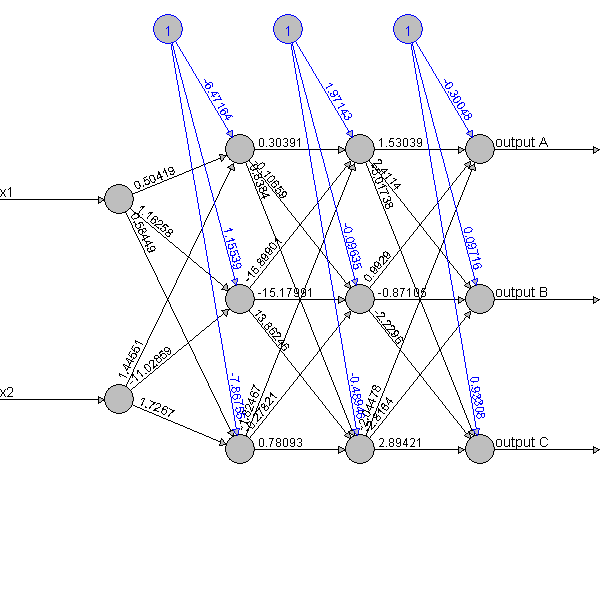

In [32]:
set.seed(0)
model = neuralnet(classA+classB+classC~x1+x2, data.nn, hidden=c(3,3), act.fct="logistic", algorithm="rprop+", rep=1, linear.output=FALSE)
model$model.list$response=c("output A","output B","output C")

output_size(5,5)
plot(model, rep=1, fill="gray", cex=0.7, lwd=0.5, information=FALSE)
output_size(restore)

Compute the output values for a new observation, and interpret the output values as the class probabilities.  Pick the class corresponding to the highest probability.

In [33]:
output = compute(model, new[,1:2], rep=1)$net.result
layout(fmt(new), fmt(data.frame(A=output[1], B=output[2], C=output[3]), title="output"))

new 
 
 
 x1 
 x2 
 
 
 
 
 5.2 
 4 
 
 
 
 output 
 
 
 A 
 B 
 C 
 
 
 
 
 0.4045602 
 0.3311386 
 0.2461135

In [34]:
prob = data.frame(A=output[1], B=output[2], C=output[3])
layout(fmt(new), fmt(prob), fmt(pick(prob, max), "pick", force=TRUE))

new 
 
 
 x1 
 x2 
 
 
 
 
 5.2 
 4 
 
 
 
 prob 
 
 
 A 
 B 
 C 
 
 
 
 
 0.4045602 
 0.3311386 
 0.2461135 
 
 
 
   
 
 
 pick 
 
 
 
 
 A

## One vs. Many

Convert any binary classifier to a multinomial classifier. 

### Data Representation

For each class value, construct a one vs. many dataset.

A vs. other:

In [35]:
data.Ao = data[, c("x1","x2")]
data.Ao$class = NA
data.Ao$class[data$class=="A"] = "A"
data.Ao$class[data$class!="A"] = "other"
data.Ao$class = factor(data.Ao$class)

layout(fmt(size(data)), fmt(data), fmt(size(data.Ao)), fmt(data.Ao))

size(data) 
 
 
 observations 
 variables 
 
 
 
 
 15 
 3 
 
 
 
 data 
 
 
 x1 
 x2 
 class 
 
 
 
 
 1 
 5 
 B 
 
 
 1 
 6 
 C 
 
 
 4 
 3 
 B 
 
 
 2 
 4 
 A 
 
 
 2 
 7 
 A 
 
 
 6 
 8 
 A 
 
 
 7 
 2 
 A 
 
 
 7 
 3 
 A 
 
 
 7 
 5 
 B 
 
 
 7 
 5 
 C 
 
 
 8 
 6 
 A 
 
 
 8 
 9 
 B 
 
 
 9 
 1 
 C 
 
 
 9 
 2 
 B 
 
 
 9 
 3 
 C 
 
 
 
 size(data.Ao) 
 
 
 observations 
 variables 
 
 
 
 
 15 
 3 
 
 
 
 data.Ao 
 
 
 x1 
 x2 
 class 
 
 
 
 
 1 
 5 
 other 
 
 
 1 
 6 
 other 
 
 
 4 
 3 
 other 
 
 
 2 
 4 
 A 
 
 
 2 
 7 
 A 
 
 
 6 
 8 
 A 
 
 
 7 
 2 
 A 
 
 
 7 
 3 
 A 
 
 
 7 
 5 
 other 
 
 
 7 
 5 
 other 
 
 
 8 
 6 
 A 
 
 
 8 
 9 
 other 
 
 
 9 
 1 
 other 
 
 
 9 
 2 
 other 
 
 
 9 
 3 
 other

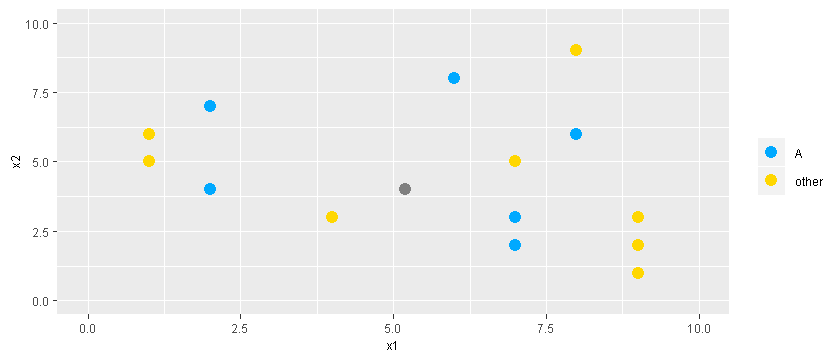

In [36]:
ggplot(data.Ao) + xlim(0,10) + ylim(0,10) +
geom_point(aes(x=x1, y=x2, color=class)) + geom_point(aes(x=x1, y=x2), data=new) +
scale_color_manual(values=c(PALETTE[1],"gold"))

B vs. other:

In [37]:
data.Bo = data[, c("x1","x2")]
data.Bo$class = NA
data.Bo$class[data$class=="B"] = "B"
data.Bo$class[data$class!="B"] = "other"
data.Bo$class = factor(data.Bo$class)

layout(fmt(size(data)), fmt(data), fmt(size(data.Bo)), fmt(data.Bo))

size(data) 
 
 
 observations 
 variables 
 
 
 
 
 15 
 3 
 
 
 
 data 
 
 
 x1 
 x2 
 class 
 
 
 
 
 1 
 5 
 B 
 
 
 1 
 6 
 C 
 
 
 4 
 3 
 B 
 
 
 2 
 4 
 A 
 
 
 2 
 7 
 A 
 
 
 6 
 8 
 A 
 
 
 7 
 2 
 A 
 
 
 7 
 3 
 A 
 
 
 7 
 5 
 B 
 
 
 7 
 5 
 C 
 
 
 8 
 6 
 A 
 
 
 8 
 9 
 B 
 
 
 9 
 1 
 C 
 
 
 9 
 2 
 B 
 
 
 9 
 3 
 C 
 
 
 
 size(data.Bo) 
 
 
 observations 
 variables 
 
 
 
 
 15 
 3 
 
 
 
 data.Bo 
 
 
 x1 
 x2 
 class 
 
 
 
 
 1 
 5 
 B 
 
 
 1 
 6 
 other 
 
 
 4 
 3 
 B 
 
 
 2 
 4 
 other 
 
 
 2 
 7 
 other 
 
 
 6 
 8 
 other 
 
 
 7 
 2 
 other 
 
 
 7 
 3 
 other 
 
 
 7 
 5 
 B 
 
 
 7 
 5 
 other 
 
 
 8 
 6 
 other 
 
 
 8 
 9 
 B 
 
 
 9 
 1 
 other 
 
 
 9 
 2 
 B 
 
 
 9 
 3 
 other

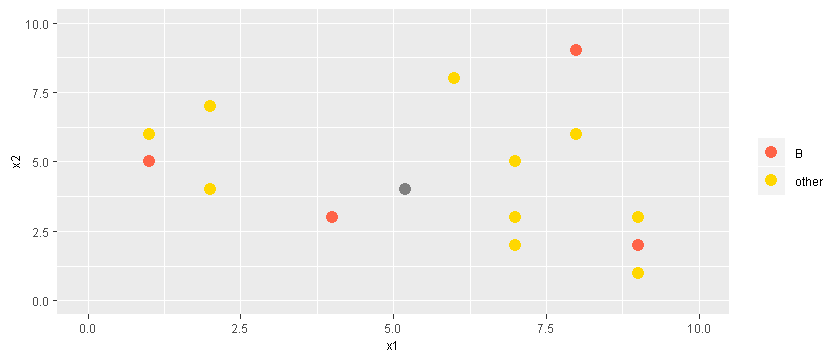

In [38]:
ggplot(data.Bo) + xlim(0,10) + ylim(0,10) +
geom_point(aes(x=x1, y=x2, color=class)) + geom_point(aes(x=x1, y=x2), data=new) +
scale_color_manual(values=c(PALETTE[2],"gold"))

C vs. other:

In [39]:
data.Co = data[, c("x1","x2")]
data.Co$class = NA
data.Co$class[data$class=="C"] = "C"
data.Co$class[data$class!="C"] = "other"
data.Co$class = factor(data.Co$class)

layout(fmt(size(data)), fmt(data), fmt(size(data.Co)), fmt(data.Co))

size(data) 
 
 
 observations 
 variables 
 
 
 
 
 15 
 3 
 
 
 
 data 
 
 
 x1 
 x2 
 class 
 
 
 
 
 1 
 5 
 B 
 
 
 1 
 6 
 C 
 
 
 4 
 3 
 B 
 
 
 2 
 4 
 A 
 
 
 2 
 7 
 A 
 
 
 6 
 8 
 A 
 
 
 7 
 2 
 A 
 
 
 7 
 3 
 A 
 
 
 7 
 5 
 B 
 
 
 7 
 5 
 C 
 
 
 8 
 6 
 A 
 
 
 8 
 9 
 B 
 
 
 9 
 1 
 C 
 
 
 9 
 2 
 B 
 
 
 9 
 3 
 C 
 
 
 
 size(data.Co) 
 
 
 observations 
 variables 
 
 
 
 
 15 
 3 
 
 
 
 data.Co 
 
 
 x1 
 x2 
 class 
 
 
 
 
 1 
 5 
 other 
 
 
 1 
 6 
 C 
 
 
 4 
 3 
 other 
 
 
 2 
 4 
 other 
 
 
 2 
 7 
 other 
 
 
 6 
 8 
 other 
 
 
 7 
 2 
 other 
 
 
 7 
 3 
 other 
 
 
 7 
 5 
 other 
 
 
 7 
 5 
 C 
 
 
 8 
 6 
 other 
 
 
 8 
 9 
 other 
 
 
 9 
 1 
 C 
 
 
 9 
 2 
 other 
 
 
 9 
 3 
 C

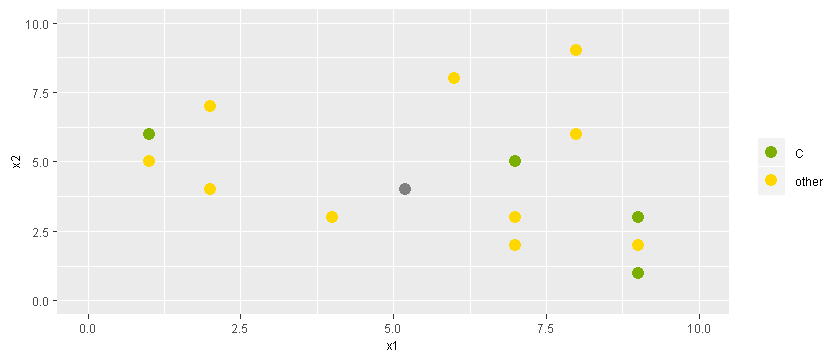

In [40]:
ggplot(data.Co) + xlim(0,10) + ylim(0,10) +
geom_point(aes(x=x1, y=x2, color=class)) + geom_point(aes(x=x1, y=x2), data=new) +
scale_color_manual(values=c(PALETTE[3],"gold"))

### Models

For each class value, construct a one vs. many model.

Here we construct 3 one vs. many logistic regression models.  The first model predicts A vs. other, the second model predicts B vs. other, and the third model predicts C vs. other.

Model A vs. Other:

In [41]:
model.Ao = glm(class ~ x1+x2, binomial(link="logit"), data.Ao)
model.Ao


Call:  glm(formula = class ~ x1 + x2, family = binomial(link = "logit"), 
    data = data.Ao)

Coefficients:
(Intercept)           x1           x2  
    0.51166      0.07083     -0.10946  

Degrees of Freedom: 14 Total (i.e. Null);  12 Residual
Null Deviance:	    20.19 
Residual Deviance: 19.73 	AIC: 25.73

Model B vs. Other:

In [42]:
model.Bo = glm(class ~ x1+x2, binomial(link="logit"), data.Bo)
model.Bo


Call:  glm(formula = class ~ x1 + x2, family = binomial(link = "logit"), 
    data = data.Bo)

Coefficients:
(Intercept)           x1           x2  
    1.07320     -0.01410     -0.06418  

Degrees of Freedom: 14 Total (i.e. Null);  12 Residual
Null Deviance:	    19.1 
Residual Deviance: 19.03 	AIC: 25.03

Model C vs. Other:

In [43]:
model.Co = glm(class ~ x1+x2, binomial(link="logit"), data.Co)
model.Co


Call:  glm(formula = class ~ x1 + x2, family = binomial(link = "logit"), 
    data = data.Co)

Coefficients:
(Intercept)           x1           x2  
    0.47021     -0.06566      0.21658  

Degrees of Freedom: 14 Total (i.e. Null);  12 Residual
Null Deviance:	    17.4 
Residual Deviance: 16.5 	AIC: 22.5

### Prediction

For a new observation, predict class probabilities based on each one vs. many model.

In [44]:
prob.Ao.other = predict(model.Ao, new, type="response")
prob.Ao = data.frame(A=1-prob.Ao.other, other=prob.Ao.other)

prob.Bo.other = predict(model.Bo, new, type="response")
prob.Bo = data.frame(B=1-prob.Bo.other, other=prob.Bo.other)

prob.Co.other = predict(model.Co, new, type="response")
prob.Co = data.frame(C=1-prob.Co.other, other=prob.Co.other)

layout(fmt(new), fmt(prob.Ao), fmt(prob.Bo), fmt(prob.Co))

x1,x2
5.2,4
A,other
0.3912388,0.6087612
B,other
0.3223126,0.6776874
C,other
0.2699082,0.7300918


Compare class probabilities across all one vs. many models.  Pick the class value corresponding to the highest class probability.

In [45]:
prob = data.frame(A=prob.Ao$A, B=prob.Bo$B, C=prob.Co$C)
layout(fmt(new), fmt(prob), fmt(pick(prob, max), "pick", force=TRUE))

new 
 
 
 x1 
 x2 
 
 
 
 
 5.2 
 4 
 
 
 
 prob 
 
 
 A 
 B 
 C 
 
 
 
 
 0.3912388 
 0.3223126 
 0.2699082 
 
 
 
   
 
 
 pick 
 
 
 
 
 A

## One vs. One

Convert any binary classifier to a multinomial classifier. 

### Data Representation

For each class value pair, construct a one vs. one dataset.  There will be $\frac{n!}{2!(n-2)!} = \frac{(n)(n-1)(n-2)...(n-2+1)}{2}$ new datasets, where $n$ is number of class values.

A vs. B:

In [47]:
data.AB = data[data$class %in% c("A","B"),]

layout(fmt(size(data)), fmt(data), fmt(size(data.AB)), fmt(data.AB))

size(data) 
 
 
 observations 
 variables 
 
 
 
 
 15 
 3 
 
 
 
 data 
 
 
 x1 
 x2 
 class 
 
 
 
 
 1 
 5 
 B 
 
 
 1 
 6 
 C 
 
 
 4 
 3 
 B 
 
 
 2 
 4 
 A 
 
 
 2 
 7 
 A 
 
 
 6 
 8 
 A 
 
 
 7 
 2 
 A 
 
 
 7 
 3 
 A 
 
 
 7 
 5 
 B 
 
 
 7 
 5 
 C 
 
 
 8 
 6 
 A 
 
 
 8 
 9 
 B 
 
 
 9 
 1 
 C 
 
 
 9 
 2 
 B 
 
 
 9 
 3 
 C 
 
 
 
 size(data.AB) 
 
 
 observations 
 variables 
 
 
 
 
 11 
 3 
 
 
 
 data.AB 
 
 
 x1 
 x2 
 class 
 
 
 
 
 1 
 5 
 B 
 
 
 4 
 3 
 B 
 
 
 2 
 4 
 A 
 
 
 2 
 7 
 A 
 
 
 6 
 8 
 A 
 
 
 7 
 2 
 A 
 
 
 7 
 3 
 A 
 
 
 7 
 5 
 B 
 
 
 8 
 6 
 A 
 
 
 8 
 9 
 B 
 
 
 9 
 2 
 B

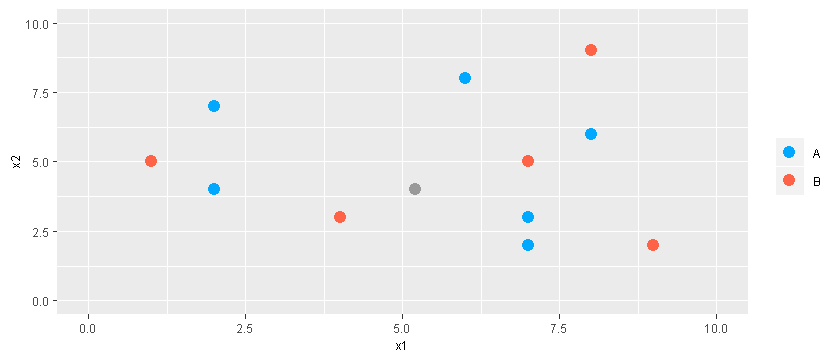

In [48]:
ggplot(data.AB) + xlim(0,10) + ylim(0,10) +
geom_point(aes(x=x1, y=x2, color=class)) +
geom_point(aes(x=x1, y=x2), data=new, color=NEW_COLOR) +
scale_color_manual(values=PALETTE[1:2])

A vs. C:

In [49]:
data.AC = data[data$class %in% c("A","C"),]
layout(fmt(size(data)), fmt(data), fmt(size(data.AC)), fmt(data.AC))

size(data) 
 
 
 observations 
 variables 
 
 
 
 
 15 
 3 
 
 
 
 data 
 
 
 x1 
 x2 
 class 
 
 
 
 
 1 
 5 
 B 
 
 
 1 
 6 
 C 
 
 
 4 
 3 
 B 
 
 
 2 
 4 
 A 
 
 
 2 
 7 
 A 
 
 
 6 
 8 
 A 
 
 
 7 
 2 
 A 
 
 
 7 
 3 
 A 
 
 
 7 
 5 
 B 
 
 
 7 
 5 
 C 
 
 
 8 
 6 
 A 
 
 
 8 
 9 
 B 
 
 
 9 
 1 
 C 
 
 
 9 
 2 
 B 
 
 
 9 
 3 
 C 
 
 
 
 size(data.AC) 
 
 
 observations 
 variables 
 
 
 
 
 10 
 3 
 
 
 
 data.AC 
 
 
 x1 
 x2 
 class 
 
 
 
 
 1 
 6 
 C 
 
 
 2 
 4 
 A 
 
 
 2 
 7 
 A 
 
 
 6 
 8 
 A 
 
 
 7 
 2 
 A 
 
 
 7 
 3 
 A 
 
 
 7 
 5 
 C 
 
 
 8 
 6 
 A 
 
 
 9 
 1 
 C 
 
 
 9 
 3 
 C

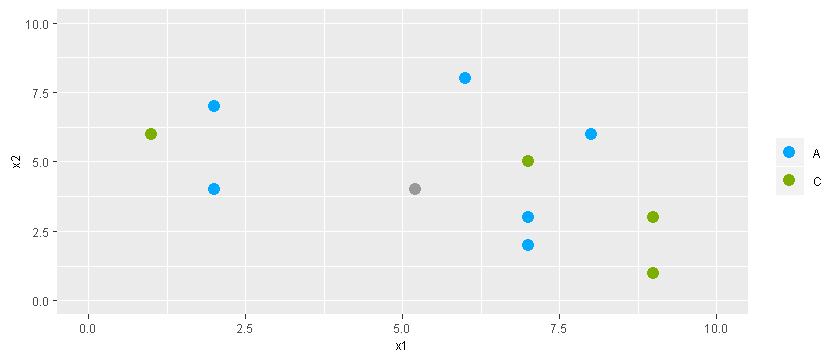

In [50]:
ggplot(data.AC) + xlim(0,10) + ylim(0,10) +
geom_point(aes(x=x1, y=x2, color=class)) +
geom_point(aes(x=x1, y=x2), data=new, color=NEW_COLOR) +
scale_color_manual(values=PALETTE[c(1,3)])

B vs. C:

In [51]:
data.BC = data[data$class %in% c("B","C"),]
layout(fmt(size(data)), fmt(data), fmt(size(data.BC)), fmt(data.BC))

size(data) 
 
 
 observations 
 variables 
 
 
 
 
 15 
 3 
 
 
 
 data 
 
 
 x1 
 x2 
 class 
 
 
 
 
 1 
 5 
 B 
 
 
 1 
 6 
 C 
 
 
 4 
 3 
 B 
 
 
 2 
 4 
 A 
 
 
 2 
 7 
 A 
 
 
 6 
 8 
 A 
 
 
 7 
 2 
 A 
 
 
 7 
 3 
 A 
 
 
 7 
 5 
 B 
 
 
 7 
 5 
 C 
 
 
 8 
 6 
 A 
 
 
 8 
 9 
 B 
 
 
 9 
 1 
 C 
 
 
 9 
 2 
 B 
 
 
 9 
 3 
 C 
 
 
 
 size(data.BC) 
 
 
 observations 
 variables 
 
 
 
 
 9 
 3 
 
 
 
 data.BC 
 
 
 x1 
 x2 
 class 
 
 
 
 
 1 
 5 
 B 
 
 
 1 
 6 
 C 
 
 
 4 
 3 
 B 
 
 
 7 
 5 
 B 
 
 
 7 
 5 
 C 
 
 
 8 
 9 
 B 
 
 
 9 
 1 
 C 
 
 
 9 
 2 
 B 
 
 
 9 
 3 
 C

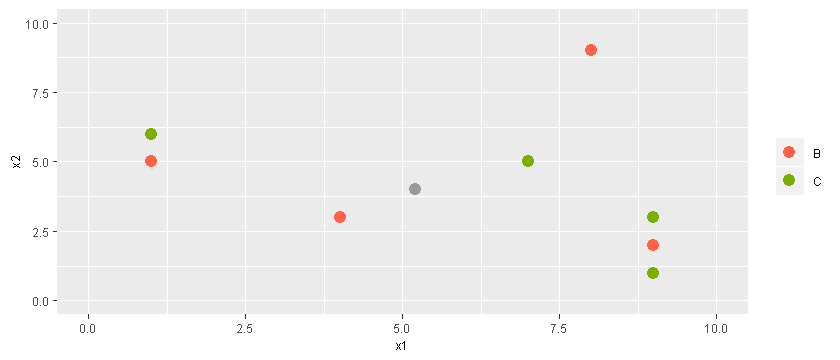

In [52]:
ggplot(data.BC) + xlim(0,10) + ylim(0,10) +
geom_point(aes(x=x1, y=x2, color=class)) +
geom_point(aes(x=x1, y=x2), data=new, color=NEW_COLOR) +
scale_color_manual(values=PALETTE[2:3])

### Models

For each class value pair, construct a one vs. one model.

Here we construct 3 one vs. one logistic regression models.  The first model predicts A vs. B, the second model predicts A vs. C, and the third model predicts B vs. C.

A vs. B:

In [30]:
model.AB = glm(class ~ x1+x2, binomial(link="logit"), data.AB)
model.AB


Call:  glm(formula = class ~ x1 + x2, family = binomial(link = "logit"), 
    data = data.AB)

Coefficients:
(Intercept)           x1           x2  
   -0.37293      0.06389     -0.03370  

Degrees of Freedom: 10 Total (i.e. Null);  8 Residual
Null Deviance:	    15.16 
Residual Deviance: 15.06 	AIC: 21.06

A vs. C:

In [31]:
model.AC = glm(class ~ x1+x2, binomial(link="logit"), data.AC)
model.AC


Call:  glm(formula = class ~ x1 + x2, family = binomial(link = "logit"), 
    data = data.AC)

Coefficients:
(Intercept)           x1           x2  
    0.33072      0.05669     -0.24487  

Degrees of Freedom: 9 Total (i.e. Null);  7 Residual
Null Deviance:	    13.46 
Residual Deviance: 12.59 	AIC: 18.59

B vs. C:

In [32]:
model.BC = glm(class ~ x1+x2, binomial(link="logit"), data.BC)
model.BC


Call:  glm(formula = class ~ x1 + x2, family = binomial(link = "logit"), 
    data = data.BC)

Coefficients:
(Intercept)           x1           x2  
    0.49191      0.02621     -0.20545  

Degrees of Freedom: 8 Total (i.e. Null);  6 Residual
Null Deviance:	    12.37 
Residual Deviance: 11.86 	AIC: 17.86

### Prediction

For a new observation, predict class probabilities based on each one vs. one model.

In [33]:
output.AB = predict(model.AB, new, type="response")
prob.AB = data.frame(A=1-output.AB, B=output.AB)

output.AC = predict(model.AC, new, type="response")
prob.AC = data.frame(A=1-output.AC, C=output.AC)

output.BC = predict(model.BC, new, type="response")
prob.BC = data.frame(B=1-output.BC, C=output.BC)

layout(fmt(new), fmt(prob.AB), fmt(prob.AC), fmt(prob.BC))

x1,x2
5.2,4
A,B
0.543769,0.456231
A,C
0.5875826,0.4124174
B,C
0.5482489,0.4517511


Determine the round robin winner among all models.  Ties can be broken arbitrarily or according to some pre-determined rule.

In [34]:
data.frame(model=c("A vs. B", "A vs. C", "B vs. C"),
           prob.A=c(prob.AB$A, prob.AC$A, ""),
           prob.B=c(prob.AB$B, "", prob.BC$B),
           prob.C=c("", prob.AC$C, prob.BC$C),
           winner=factor(c(as.character(pick(prob.AB, max)),
                           as.character(pick(prob.AC, max)),
                           as.character(pick(prob.BC, max))), levels=c("A","B","C")))

model,prob.A,prob.B,prob.C,winner
A vs. B,0.543769043496925,0.456230956503075,,A
A vs. C,0.587582604358241,,0.412417395641759,A
B vs. C,,0.548248892044138,0.451751107955862,B


In [35]:
fmt(round_robin(prob.AB, prob.AC, prob.BC)) # round_robin function accepts any number of arguments

"round_robin(prob.AB, prob.AC, prob.BC)"
A


Note: You could enhance the round robin step to account for cutoffs.

## Code

### Useful Functions

In [36]:
# dummify     # from setup.R
# pick        # from setup.R
# round_robin # from setup.R

### Templates

In [37]:
# Multinomial Naive Bayes

data = data.frame(x1   =c( 1,  1,  4,  2,  2, 6),
                  x2   =c( 5,  6,  3,  4,  7, 8),
                  class=c("B","C","B","C","A","A"))
new = data.frame(x1=5.2, x2=4)

model = naiveBayes(class ~ x1+x2, data)
prob = predict(model, new, type="raw")
pick(prob, max)

[1] B
Levels: A B C

In [38]:
# Multinomial Neural Network

data = data.frame(x1   =c( 1,  1,  4,  2,  2,  6),
                  x2   =c( 5,  6,  3,  4,  7,  8),
                  class=c("B","C","B","C","A","A"))
new = data.frame(x1=5.2, x2=4)

set.seed(0)
model = neuralnet(classA+classB+classC~x1+x2, dummify(data), hidden=c(3,3), act.fct="logistic", algorithm="rprop+", rep=1, linear.output=FALSE)
output = compute(model, new[,1:2], rep=1)$net.result
prob = data.frame(A=output[1], B=output[2], C=output[3])
pick(prob, max)

[1] B
Levels: A B C

## Expectations

Know about this:
* How to build a multinomial naive bayes model and use it to predict the class of a new observation.
* How to build a multinomial neural network model and use it to predict the class of a new observation.
* How to convert any binary classifier construction method to a multinomial classifier construction method, use it to construct a multinomial classifier, and use it to predict the class of a new observation - with the one vs. many approach.
* How to convert any binary classifier construction method to a multinomial classifier construction method, use it to construct a multinomial classifier, and use it to predict the class of a new observation - with the one vs. one approach.

## Further Reading

* http://ciml.info/dl/v0_99/ciml-v0_99-ch06.pdf
* https://www.youtube.com/watch?v=N1vOgolbjSc
* https://en.wikipedia.org/wiki/Multiclass_classification
* https://www.researchgate.net/publication/320331663_MCS_Multiple_Classifier_System_to_Predict_the_Churners_in_the_Telecom_Industry
* https://www.r-bloggers.com/multilabel-classification-with-neuralnet-package/
* https://www.youtube.com/watch?v=WKPPKJVobRM&t=4s
* https://www.youtube.com/watch?v=6kzvrq-MIO0

<p style="text-align:left; font-size:10px;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float:right;">
Document revised July 17, 2020
</span>
</p>